<a href="https://colab.research.google.com/github/DucAnhishere/AIO-Exercises/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

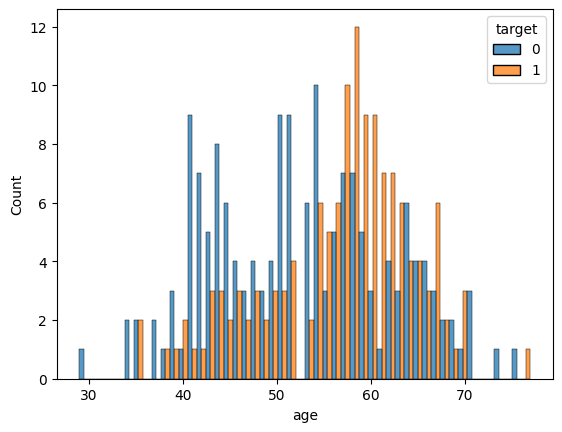

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Bài tập 1
df = pd.read_csv('/content/drive/MyDrive/AIO_2024/Colab_AIO/Projects/Heart_Disease_Prediction/cleveland.csv', header=None)

# Đặt tên cho các cột
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Sửa đổi cột 'target'
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý giá trị thiếu trong cột 'thal' và 'ca'
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân phối target vs age (thêm mã code cần thiết)
# Ví dụ vẽ biểu đồ phân phối tuổi theo target
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=50)

# Hiển thị biểu đồ
plt.show()


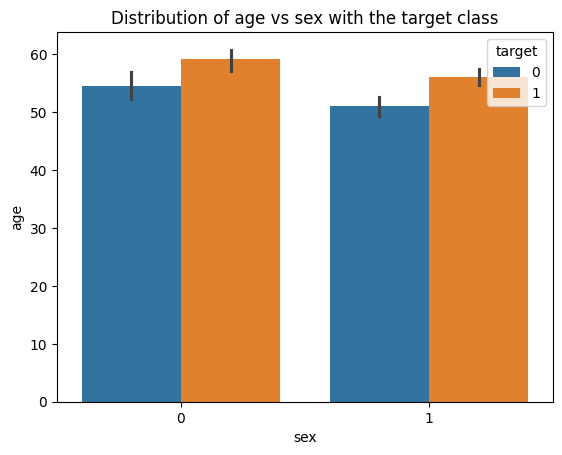

In [2]:
# bai tap 2
sns.barplot(data=df, x='sex', y='age', hue='target')
plt.title("Distribution of age vs sex with the target class")
plt.show()

In [3]:
# Bài tập 3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Tạo tập dữ liệu X và y từ DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán kết quả trên tập huấn luyện và tập kiểm tra
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho cả hai tập
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Tính độ chính xác (accuracy) cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [5]:
# Bài tập 4

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# your code here ***************************
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [8]:
# Bài tập 5 - Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Naive Bayes (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [7]:
# Bài tập 6 - Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [9]:
# Bài tập 7

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.9


In [12]:
# Bài tập 8 - AdaBoost

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình AdaBoost
ada_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
ada_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoost = 1.0
Accuracy for test set for AdaBoost = 0.9


In [13]:
# Bài tập 9 - Gradient Boosting

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Gradient Boosting = {}'.format(accuracy_for_train))
print('Accuracy for test set for Gradient Boosting = {}'.format(accuracy_for_test))


Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.85


In [14]:
# Bài tập 10 - XGBoost

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [24]:
# Bài tập 11 - Stacking

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Giả định df là DataFrame chứa dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Các mô hình cơ bản
base_models = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gc', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', random_state=42)),
    ('ad', AdaBoostClassifier(random_state=42, algorithm = 'SAMME'))
]

# Mô hình meta (có thể dùng một mô hình đơn giản như LogisticRegression hoặc một mô hình mạnh hơn)
meta_model = XGBClassifier(random_state=42)

# Xây dựng Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))


Accuracy for training set for Stacking = 0.88
Accuracy for test set for Stacking = 0.9
